In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/license.txt


# My MobApp Studio Project

The objective of this notebook is to research on app market in Google Play Store. Questions that this report will focus on are as follows:
- What is the size of the market? numbers of download and $
- Same question but per category? (percentages please)
- Depending on each category, what are the ratio of download per app?
- and others

## 1. Data Preview

In [2]:
df = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


![](http://)

In [3]:
print('There are ',len(df.App.unique()),'unique apps')

There are  9660 unique apps


## 2. Data Cleaning
- shift 10472nd row to the right
- set category of 10472nd row to "LIFESTYLE" 
- remove "+" and "," signs in Installs column
- change Installs column to int type
- remove "$" sign in Price column
- change Price column to float type
- remove 'M' from 'Size' column

In [4]:
df.loc[10472, :] = df.loc[10472, :].shift(1) 
df.iloc[10472,0] = df.iloc[10472,1]
df.iloc[10472,1] = 'LIFESTYLE'

df.Installs = df.loc[:, 'Installs'].map(lambda x: x.rstrip('+'))
df.Installs = df['Installs'].replace(',','', regex=True)
df.Installs = df['Installs'].astype(int)

df.Price = df.loc[:, 'Price'].map(lambda x: x.lstrip('$'))
df.Price = df['Price'].astype(float)

df.Size = df['Size'].str.replace('M','')
df.Size = pd.to_numeric(df['Size'], errors= 'coerce')

df.Type = df['Type'].str.replace('0','Free')

#print(df['Rating'].info())
df.Rating = df.Rating.astype(float)



## 3. Market size (Total number of downloads and money spent)

In [5]:
total_downloads = df.Installs.sum()
print('Total number of downloads of all applications: ' + str(total_downloads) + '+')

Total number of downloads of all applications: 167633434487+


In [6]:
df['Total_money'] = df['Installs'] * df['Price']
print('Total money spent for all paid applications: $' + str(df.Total_money.sum()))

Total money spent for all paid applications: $388629445.79


### 3.1. Market size per category

"Game" and "communication" apps have the highest number of installs, and owns 20.93% and 19.48% among all categories, respectively.

Apps in "Family" category have the highest income from the users by downloading those apps. They have 47.87% of all app incomes from downloading them. The next categories with high incomes are "Lifestyle" and "Game", which own 14.82% and 10.55%, respectively. 

Percentages of number of installs by category


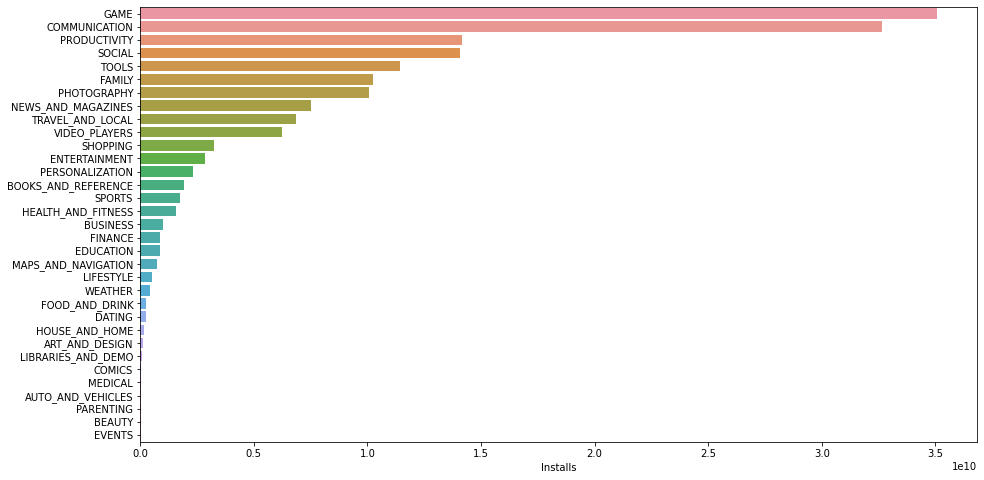

In [7]:
print('Percentages of number of installs by category')
data_category = df.groupby('Category').sum()['Installs'].sort_values(ascending= False)
#(100. * data_category / data_category.sum()).round(0)
labels = data_category.index.values
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data_category, labels, ax= ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe39ae794d0>],
      dtype=object)

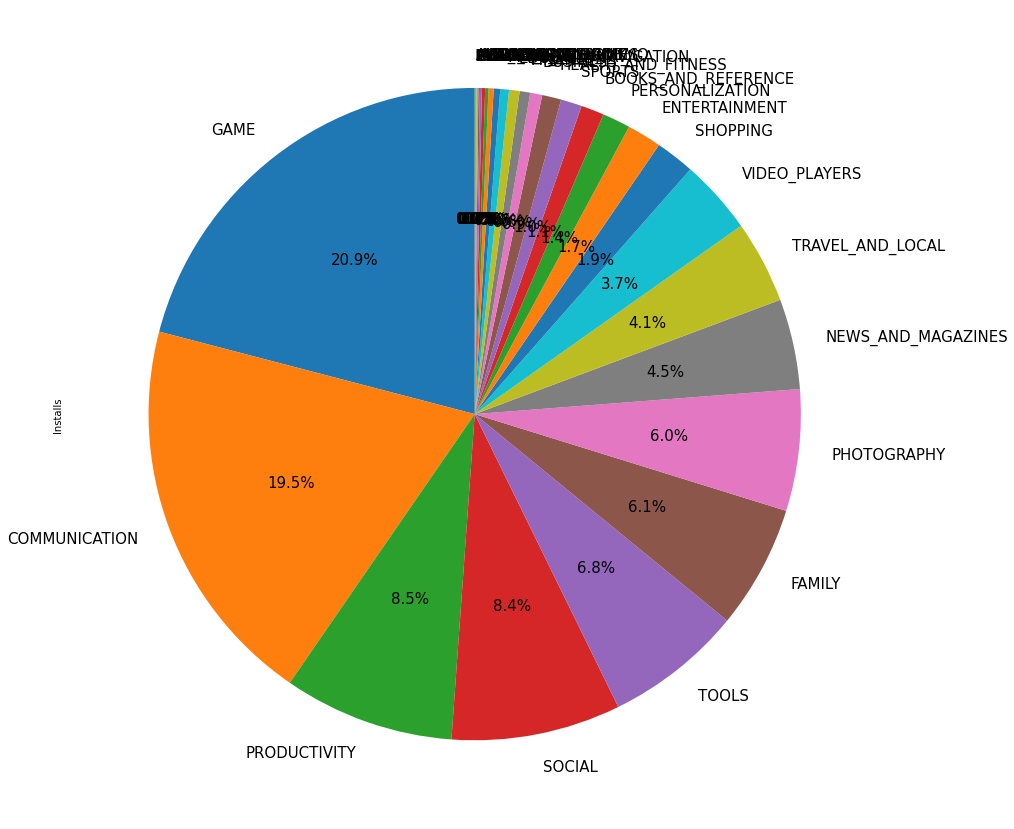

In [8]:
downloads = df.groupby('Category').sum().Installs.sort_values(ascending= False)
labels = downloads.index.values
downloads.plot.pie( y = 'Category', subplots = True, autopct='%.1f%%', 
 startangle=90, shadow=False, labels=labels, legend = False, fontsize=15, figsize=(15,15))

### 3.2. Ratio of downloads of apps by categories

*Ratio of downloads of apps by categories are shown below:*

In [9]:
df_install_percent = df.groupby(['Category'])['Installs'].sum()
for category in df_install_percent.index:
    df_ratio_app_by_cat = pd.DataFrame(columns = ['App', 'Installs'])
    df_ratio_app_by_cat = df[df['Category'] == category][['App', 'Installs']]
    df_ratio_app_by_cat['Install_ratio'] = df_ratio_app_by_cat['Installs'] / df_ratio_app_by_cat['Installs'].sum() * 100
    print('Percentages of number of Installs of apps in category ' + str(category))
    print(df_ratio_app_by_cat[['App','Install_ratio']])

Percentages of number of Installs of apps in category ART_AND_DESIGN
                                                    App  Install_ratio
0        Photo Editor & Candy Camera & Grid & ScrapBook       0.008043
1                                   Coloring book moana       0.402129
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       4.021294
3                                 Sketch - Draw & Paint      40.212936
4                 Pixel Draw - Number Art Coloring Book       0.080426
...                                                 ...            ...
7174                            Easy DIY CD Craft Ideas       0.004021
8679                                       Dp for girls       0.040213
8712             Name Art DP - Focus n Filter Text 2018       0.008043
8871                             Test Application DT 02       0.000000
8888            Spring flowers theme couleurs d t space       0.000080

[65 rows x 2 columns]
Percentages of number of Installs of apps in category AU

*Top 5 most downloaded apps by categories, and their number of installs with ratios by those categories are shown below:*

In [10]:
for category in df_install_percent.index:
    df_ratio_app_by_cat = pd.DataFrame(columns = ['App', 'Installs'])
    df_ratio_app_by_cat = df[df['Category'] == category][['App', 'Installs']]
    df_ratio_app_by_cat['Install_ratio'] = df_ratio_app_by_cat['Installs'] / df_ratio_app_by_cat['Installs'].sum() * 100
    largest5 = df_ratio_app_by_cat.nlargest(5, "Install_ratio") 
    print(category)
    print(largest5)
    print("-"*80)

ART_AND_DESIGN
                                                  App  Installs  Install_ratio
3                               Sketch - Draw & Paint  50000000      40.212936
12                     Tattoo Name On My Photo Editor  10000000       8.042587
19                                       ibis Paint X  10000000       8.042587
42                         Textgram - write on photos  10000000       8.042587
45  Canva: Poster, banner, card maker & graphic de...  10000000       8.042587
--------------------------------------------------------------------------------
AUTO_AND_VEHICLES
                                                    App  Installs  \
72        Android Auto - Maps, Media, Messaging & Voice  10000000   
8289                      AutoScout24 - used car finder  10000000   
67                                   Ulysse Speedometer   5000000   
69                          Used cars for sale - Trovit   5000000   
70    Fines of the State Traffic Safety Inspectorate...   5000000  

## 4. Rating analysis
- Rating average of all apps is 4.19

In [11]:
print("Average rating is " + str(df["Rating"].mean()))

Average rating is 4.1915127575531175


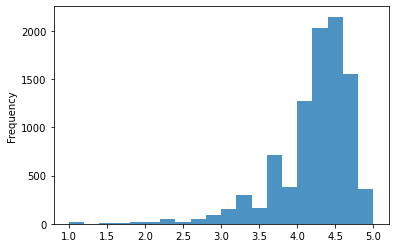

In [12]:
df['Rating'].plot.hist(bins=20, alpha = 0.8)


## 4.1. Average ratings by categories

- High-rated categories are "Events", "Education", "Art and Design", "Books and References" and "Personalization"
- Low-rated categories are "Dating", "Tools", "Maps and Navigation", "Video Players" and "Lifestyle"

In [13]:
print('Average ratings of apps by categories')
df_cat_mean_rating = df.groupby(['Category'])['Rating'].mean()
print(df_cat_mean_rating)
print('-'*40)
print('Top-5 high-rated categories')
print(df_cat_mean_rating.nlargest(5))
print('-'*40)
print('Top-5 low-rated categories')
print(df_cat_mean_rating.nsmallest(5))

Average ratings of apps by categories
Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.087937
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.